## Support Vector Machines (SVM)

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

## Dataset Creation

In [2]:
parent_dir = os.path.dirname(os.getcwd())
data = pd.read_csv(os.path.join(parent_dir, 'Data', 'Classification_data.csv'))
data

,name,dateOfBirth,Age,Height,Foot,Position,OtherPosition,National,MarketValue,Outfitter,...,25MP,25AP,Ranking,2020AvgMV,2021AvgMV,2022AvgMV,2023AvgMV,2024AvgMV,TotalCups,ValueCategory
0,Aaron Hickey,"Jun 10, 2002",22,1.85,both,Right-Back,"['Left-Back', 'Left Midfield']",Scotland,22000000.0,NaN,...,0.00,0,432.000,1.845000e+06,8.666667e+06,1.700000e+07,2.833333e+07,2.500000e+07,0,2
1,Aaron Connolly,"Jan 28, 2000",25,1.74,right,Centre-Forward,['Second Striker'],Ireland,2500000.0,NaN,...,505.00,14,3.644,5.500000e+06,7.000000e+06,5.500000e+06,3.500000e+06,2.500000e+06,2,0
2,Aaron Bastiaans,"Apr 4, 2002",22,1.84,right,Left Winger,"['Right Winger', 'Centre-Forward']",Netherlands,0.0,NaN,...,0.00,0,0.000,1.500000e+05,1.250000e+05,1.750000e+05,0.000000e+00,0.000000e+00,0,0
3,AJ Marcucci,"Jul 31, 1999",25,1.91,hand,Goalkeeper,[],United States,250000.0,NaN,...,0.00,0,0.000,0.000000e+00,1.000000e+05,1.250000e+05,1.500000e+05,2.166667e+05,0,0
4,Aarón Herrera,"Jun 6, 1997",27,1.80,right,Right-Back,"['Left-Back', 'Right Midfield']",United States,2000000.0,NaN,...,0.00,0,4.274,9.666667e+05,1.600000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12947,Simon Stefanec,"Sep 5, 1998",26,1.78,right,Attacking Midfield,"['Left Winger', 'Right Winger']",Slovakia,0.0,NaN,...,0.00,0,0.000,1.000000e+05,1.250000e+05,1.125000e+05,0.000000e+00,0.000000e+00,0,0
12948,Žan Kolmanič,"Mar 3, 2000",24,1.78,left,Left-Back,"['Left Midfield', 'Right-Back']",Slovenia,1000000.0,NaN,...,0.00,0,6.910,4.250000e+05,7.000000e+05,1.000000e+06,1.000000e+06,1.000000e+06,1,0
12949,Zan Celar,"Mar 14, 1999",25,1.86,right,Centre-Forward,['Left Winger'],Slovenia,4500000.0,NaN,...,1134.00,22,2.226,7.625000e+05,7.250000e+05,1.116667e+06,3.750000e+06,4.500000e+06,4,0
12950,Zan Majer,"Jul 25, 1992",32,1.80,right,Central Midfield,"['Attacking Midfield', 'Defensive Midfield']",Slovenia,400000.0,NaN,...,682.00,16,0.000,1.733333e+06,1.600000e+06,1.700000e+06,1.150000e+06,5.666667e+05,2,0


In [3]:
# Define categorical and numerical columns 
numeric_columns = ['Age', '20YC', '20YC2', '20RC', '20G', '20A', '20MP', '20AP', '21YC', '21YC2', '21RC', '21G', '21A', '21MP', '21AP', '22YC', '22YC2', '22RC', '22G', '22A', '22MP', '22AP', '23YC', '23YC2', '23RC', '23G', '23A', '23MP', '23AP', '24YC', '24YC2', '24RC', '24G', '24A', '24MP', '24AP', '25YC', '25YC2', '25RC', '25G', '25A', '25MP', '25AP', 'TotalCups']

target_size = 1000
train_size = 0.8

data = data[numeric_columns+ ['ValueCategory']]

# Split into features and target variable
X = data.drop(columns=['ValueCategory'])
y = data['ValueCategory']

# Separate classes
X_0, X_1 = X[y == 0], X[y == 1]
y_0, y_1 = y[y == 0], y[y == 1]


# Resample each class to match the target size
X_0_balanced, y_0_balanced = resample(X_0, y_0, n_samples=target_size, random_state=1911, replace=True)
X_1_balanced, y_1_balanced = resample(X_1, y_1, n_samples=target_size, random_state=1911, replace=True)

# Combine balanced samples
X_balanced = pd.concat([X_0_balanced, X_1_balanced], axis=0)
y_balanced = pd.concat([y_0_balanced, y_1_balanced], axis=0)

# Perform train-test split again after removing outliers
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, train_size=train_size, random_state=1911, shuffle=True
)

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=1911, stratify=y, shuffle=True)

# Standardize numerical features
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train.to_csv(os.path.join(parent_dir, 'Data', 'ModelData', 'DT' ,'X_train.csv'), index=False)
X_test.to_csv(os.path.join(parent_dir, 'Data', 'ModelData', 'DT' ,'X_test.csv'), index=False)
y_train.to_csv(os.path.join(parent_dir, 'Data', 'ModelData', 'DT' ,'y_train.csv'), index=False)
y_test.to_csv(os.path.join(parent_dir, 'Data', 'ModelData', 'DT' ,'y_test.csv'), index=False)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 44), (400, 44), (1600,), (400,))

SVM Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.79       192
           1       0.80      0.85      0.82       208

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



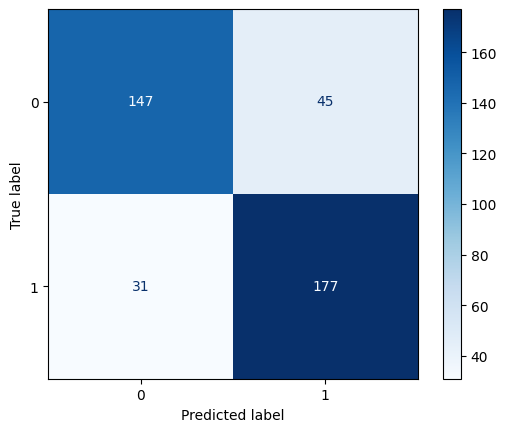

In [4]:
from sklearn.svm import SVC

# Create and train the model
svm_model = SVC(random_state=19)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm)).plot(cmap='Blues')
